In [163]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier , RadiusNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.naive_bayes import GaussianNB 
from numpy.random import shuffle

# 1- Loading data and exmaining it 

In [7]:
hoda_raw = scipy.io.loadmat('Data_hoda_full.mat') #loading the dataset

In [8]:
hoda_raw.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels'])

In [9]:
X = np.squeeze(hoda_raw['Data'])
Y = np.squeeze(hoda_raw['labels'])

SAMPLE NUMBER 100 
LABEL = 1 
SIZE = (54, 11)


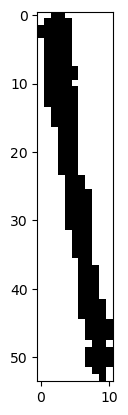

In [39]:
i = 100
plt.imshow(X[i],cmap='binary')
print(f'SAMPLE NUMBER {i} \nLABEL = {Y[i]} \nSIZE = {X[i].shape}')

In [11]:
for digit in range(10):
    print(f"There are {len(Y[Y==digit])} samples of {digit} ")

There are 6000 samples of 0 
There are 6000 samples of 1 
There are 6000 samples of 2 
There are 6000 samples of 3 
There are 6000 samples of 4 
There are 6000 samples of 5 
There are 6000 samples of 6 
There are 6000 samples of 7 
There are 6000 samples of 8 
There are 6000 samples of 9 


### range of shape 

In [403]:
X[0].shape

(27, 20)

In [405]:
shapes = [X[i].shape for i in range(60000)]

In [407]:
print(f"smallest image's shape:{min(shapes)}\nbiggest image's shape:{max(shapes)}")

smallest image's shape:(4, 5)
biggest image's shape:(62, 35)


# 2- Preprocessing

## 2-1- Resizing Images

In [12]:
from skimage.transform import resize

In [13]:
X_resized = [resize(sample,(20,20)) for sample in X]
X_resized = np.array(X_resized)
hoda = pd.DataFrame(zip(X_resized,Y),columns=['instances','labels'])

In [14]:
X_resized.shape[1] * X_resized.shape[2]

400

SAMPLE NUMBER 3 
LABEL = 2 
ORIGINAL_SIZE = (36, 17)
NEW_SIZE = (20, 20)


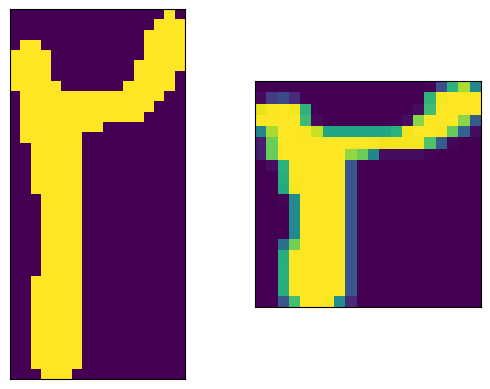

In [393]:
i = 3
fig, axes = plt.subplots(1,2)
axes[0].imshow(X[i])
axes[1].imshow(X_resized[i])
print(f"SAMPLE NUMBER {i} \nLABEL = {Y[i]} \nORIGINAL_SIZE = {X[i].shape}\nNEW_SIZE = {X_resized[i].shape}")

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

In [353]:
pwd

'/Users/radmehr/Desktop/Darsi/01_phd/semester2/Machine Learning/Assignments'

In [389]:
def grab_index_of_classes(class_name, number_of_instances = 5,data=hoda):
    axes_index = range(number_of_instances)
    all_indices = data[data['labels']==class_name]
    return all_indices.index[:number_of_instances]

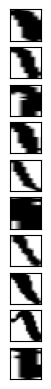

In [390]:
NUMBER_OF_INSTANCES = 10
CLASS_NAME = 1
fig, axes = plt.subplots(NUMBER_OF_INSTANCES,1)
index_list = grab_index_of_classes(CLASS_NAME,NUMBER_OF_INSTANCES,hoda)
instance_range = range(NUMBER_OF_INSTANCES)
for instance in instance_range:
    axes[instance].imshow(new['instances'][index_list[instance]],cmap='binary')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
#fig.savefig(f'{CLASS_NAME}s.tiff')

## 2-2- Feature Extraction 

In [15]:
sample_size = X_resized.shape[0]
feature_vector_size = X_resized.shape[1] * X_resized.shape[2]
X_vectorized = np.reshape(X_resized,(sample_size,feature_vector_size,1))

# 3- Spliting data into training, validation, and test sets

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X_vectorized,Y,test_size=0.33333,random_state=42) #spliting data into training and test sets
x_train, x_validation, y_train, y_validation = train_test_split(x_train,y_train,test_size= 0.25, random_state=42)

In [274]:
print(f'Training set shape:{x_train.shape}\nValidation set shape:{x_validation.shape}\nTest set shape:{x_test.shape}')

Training set shape:(30000, 400, 1)
Validation set shape:(10000, 400, 1)
Test set shape:(20000, 400, 1)


In [45]:
labels_of_interest = y_train 
set_of_interest = 'training'
for digit in range(10):
    print(f"There are {len(labels_of_interest[labels_of_interest==digit])} samples of {digit} in the {set_of_interest} set")

There are 3037 samples of 0 in the training set
There are 3001 samples of 1 in the training set
There are 2987 samples of 2 in the training set
There are 2992 samples of 3 in the training set
There are 2977 samples of 4 in the training set
There are 2951 samples of 5 in the training set
There are 3023 samples of 6 in the training set
There are 2994 samples of 7 in the training set
There are 3082 samples of 8 in the training set
There are 2956 samples of 9 in the training set


# 4- Building a dummy classifier to obtain a baseline accuracy

In [41]:
from sklearn.dummy import DummyClassifier

In [236]:
clf = DummyClassifier(strategy='most_frequent').fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [239]:
start_time = time.time()

y_pred = clf.predict(x_test)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")


Elapsed time: 0.0007801055908203125 seconds


##  performance of dummy classifier 

In [78]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score


In [238]:
accuracy_score(y_test,y_pred) * 100

9.94

In [86]:
precision_score(y_test,y_pred,average='macro')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.009940000000000001

In [87]:
precision_score(y_test,y_pred,average='micro')

0.0994

In [92]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred,average='micro')))
print('Recall Score : ' + str(recall_score(y_test,y_pred,average='micro')))
print('F1 Score : ' + str(f1_score(y_test,y_pred,average='micro')))

#Dummy Classifier Confusion matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.0994
Precision Score : 0.0994
Recall Score : 0.0994
F1 Score : 0.09940000000000002
Confusion Matrix : 
[[   0    0    0    0    0    0    0    0 1950    0]
 [   0    0    0    0    0    0    0    0 2011    0]
 [   0    0    0    0    0    0    0    0 1983    0]
 [   0    0    0    0    0    0    0    0 2023    0]
 [   0    0    0    0    0    0    0    0 1990    0]
 [   0    0    0    0    0    0    0    0 2022    0]
 [   0    0    0    0    0    0    0    0 1984    0]
 [   0    0    0    0    0    0    0    0 1991    0]
 [   0    0    0    0    0    0    0    0 1988    0]
 [   0    0    0    0    0    0    0    0 2058    0]]


# 5- KNN

In [101]:
x_train = x_train.reshape((x_train.shape[0], -1))   #reshaping the 3-d vector into a 2-d vector that can be fed to
                                                    # KNN classifier. the original shape of x_train is 
                                                    # "n_samples, n_rows, n_cols". we want to have a 2-d data and
                                                    # the expression x_train.reshape((x_train.shape[0], -1)) will 
                                                    #reshape the array into a two-dimensional array with shape 
                                                    #(n_samples, n_rows * n_cols)
x_test = x_test.reshape((x_test.shape[0], -1))

## Running KNN with default parameters 

In [301]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
#y_pred = knn.predict(x_test)

KNeighborsClassifier(n_neighbors=3)

In [353]:
start_time = time.time()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")


Elapsed time: 8.99095606803894 seconds


In [303]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred,average='micro')))
print('Recall Score : ' + str(recall_score(y_test,y_pred,average='micro')))
print('F1 Score : ' + str(f1_score(y_test,y_pred,average='micro')))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.98395
Precision Score : 0.98395
Recall Score : 0.98395
F1 Score : 0.98395
Confusion Matrix : 
[[1932   16    0    0    0    1    0    1    0    0]
 [  23 1985    0    0    0    0    2    0    0    1]
 [   0   13 1950   12    1    0    1    4    0    2]
 [   0    1   63 1936   22    1    0    0    0    0]
 [   1    8   17   26 1932    1    5    0    0    0]
 [  22    1    0    0    2 1987    1    0    9    0]
 [   1    5    2    0    1    0 1953    1    0   21]
 [   1    1    0    0    0    0    1 1988    0    0]
 [   0    3    0    0    0    0    0    0 1985    0]
 [   1    9    1    0    0    0   14    0    2 2031]]


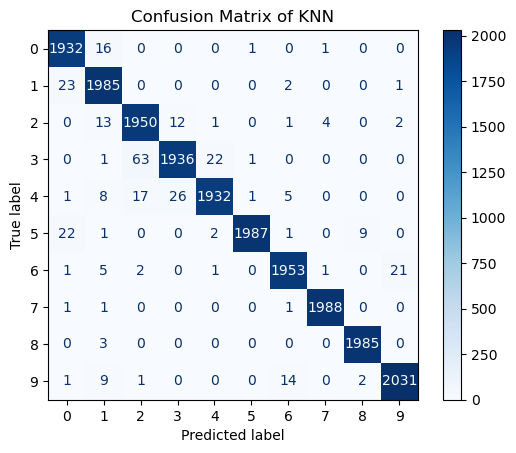

In [313]:
disp = ConfusionMatrixDisplay.from_estimator(knn, x_test,  y_test, display_labels=range(10),cmap=plt.cm.Blues,
                                      normalize= None)
disp.ax_.set_title('Confusion Matrix of KNN')
plt.savefig(f'KNN_confusion.tiff',dpi=300)

##  KNN with Grid Search 

In [305]:
k_range = list(range(1, 16,2))
param_grid = dict(n_neighbors=k_range)

In [307]:
grid = GridSearchCV(knn, param_grid, cv=8, scoring='accuracy')

In [308]:
start_time = time.time()

grid.fit(x_test,y_test)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")


Elapsed time: 42.711353063583374 seconds


In [309]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 1}
0.9799998572356888


In [310]:
results = grid.cv_results_
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print(f"{mean_score:.5f} for {params}")

0.98000 for {'n_neighbors': 1}
0.97955 for {'n_neighbors': 3}
0.97960 for {'n_neighbors': 5}
0.97900 for {'n_neighbors': 7}
0.97790 for {'n_neighbors': 9}
0.97580 for {'n_neighbors': 11}
0.97540 for {'n_neighbors': 13}
0.97510 for {'n_neighbors': 15}


# Naive Bayes

## Default parameters  

In [279]:
bayes = GaussianNB(var_smoothing=0.1)

In [280]:
bayes.fit(x_train,y_train)

GaussianNB(var_smoothing=0.1)

In [281]:
start_time = time.time()

y_pred = bayes.predict(x_test)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 0.13872480392456055 seconds


In [282]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred,average='micro')))
print('Recall Score : ' + str(recall_score(y_test,y_pred,average='micro')))
print('F1 Score : ' + str(f1_score(y_test,y_pred,average='micro')))

#Dummy Classifier Confusion matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.88325
Precision Score : 0.88325
Recall Score : 0.88325
F1 Score : 0.8832500000000001
Confusion Matrix : 
[[1876   38    0    0    4   29    2    1    0    0]
 [ 182 1623   83    0   18    0   15    0    0   90]
 [   0   45 1340  414   27    0   14   31    0  112]
 [   0    1  127 1826   42    2    8    0    0   17]
 [   0   11   50  156 1692   40   19    0    4   18]
 [   7   16    6    0    2 1981    4    0    6    0]
 [   0    2   82    8    9    0 1452   92    0  339]
 [   1    7   21    7   27    0   12 1916    0    0]
 [   2    8    1    0    2    8    9    0 1949    9]
 [   1   13    3    0    1    0   19    0   11 2010]]


AttributeError: 'numpy.ndarray' object has no attribute 'uniques'

In [297]:
pwd

'/Users/radmehr/Desktop/Darsi/01_phd/semester2/Machine Learning/Assignments'

In [283]:
from sklearn.metrics import ConfusionMatrixDisplay

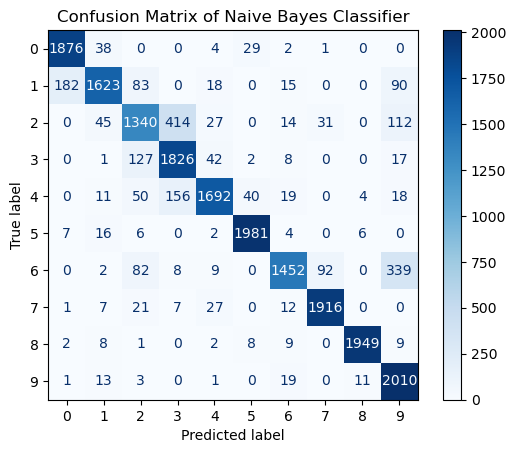

In [300]:
disp = ConfusionMatrixDisplay.from_estimator(bayes, x_test,  y_test, display_labels=range(10),cmap=plt.cm.Blues,
                                      normalize= None)
disp.ax_.set_title('Confusion Matrix of Naive Bayes Classifier')
plt.savefig(f'Bayes_confusion.tiff',dpi=300)

## Grid Search optimization 

In [272]:
param_grid = {'var_smoothing': [1e-06, 1e-05, 1e-04, 1e-03, 1e-02,1e-01,1,10]}

In [273]:
grid = GridSearchCV(bayes, param_grid, cv=8, scoring='accuracy')

In [274]:
start_time = time.time()

grid.fit(x_train,y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")


Elapsed time: 4.714603900909424 seconds


In [275]:
print(grid.best_params_)
print(grid.best_score_)

{'var_smoothing': 0.1}
0.8808333333333334


In [278]:
results = grid.cv_results_
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print(f"{mean_score:.3f} for {params}")

0.864 for {'var_smoothing': 1e-06}
0.865 for {'var_smoothing': 1e-05}
0.867 for {'var_smoothing': 0.0001}
0.871 for {'var_smoothing': 0.001}
0.876 for {'var_smoothing': 0.01}
0.881 for {'var_smoothing': 0.1}
0.862 for {'var_smoothing': 1}
0.841 for {'var_smoothing': 10}


# Parzen Window

In [362]:
parzen = RadiusNeighborsClassifier(radius=8.8)
#parzen.fit(x_train,y_train)

start_time = time.time()
parzen.fit(x_train,y_train)
y_pred = parzen.predict(x_test)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 5.556707143783569 seconds


In [320]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred,average='micro')))
print('Recall Score : ' + str(recall_score(y_test,y_pred,average='micro')))
print('F1 Score : ' + str(f1_score(y_test,y_pred,average='micro')))

#Dummy Classifier Confusion matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.89545
Precision Score : 0.89545
Recall Score : 0.89545
F1 Score : 0.89545
Confusion Matrix : 
[[1925   18    0    0    1    4    0    2    0    0]
 [ 252 1739    5    0    0    0    7    0    0    8]
 [   0  152 1465  324    2    0    6   21    0   13]
 [   0    5  245 1739   29    1    0    2    0    2]
 [   0   15   95  207 1662    2    7    0    0    2]
 [  25   12    0    0    0 1934    1    0   49    1]
 [   1   16   36    0    2    0 1543   94    1  291]
 [   1    8   25    0    4    0    6 1947    0    0]
 [   0   16    0    0    0    0    0    0 1970    2]
 [   1   55    0    0    0    0   12    1    4 1985]]


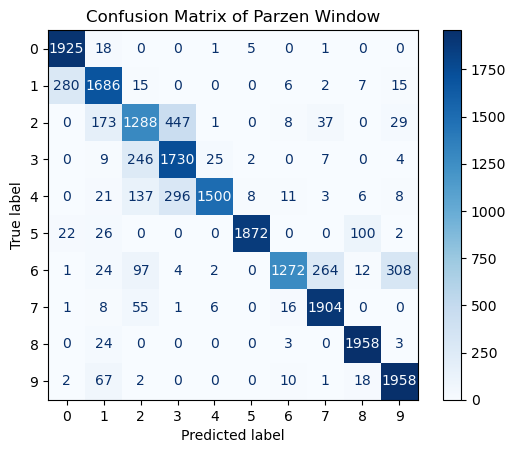

In [333]:
disp = ConfusionMatrixDisplay.from_estimator(parzen, x_test,  y_test, display_labels=range(10),cmap=plt.cm.Blues,
                                      normalize= None)
disp.ax_.set_title('Confusion Matrix of Parzen Window')
plt.savefig(f'parzen_confusion.tiff',dpi=300)

## GRID SEARCH

In [327]:
param_grid = {'radius': [9.5,10, 11, 12,13,14,15,20]}
grid = GridSearchCV(parzen, param_grid, cv=8, scoring='accuracy')

In [328]:
start_time = time.time()

grid.fit(x_train,y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 73.81376910209656 seconds


In [329]:
print(grid.best_params_)
print(grid.best_score_)

{'radius': 9.5}
0.8555333333333334


In [331]:
results = grid.cv_results_
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print(f"{mean_score:.3f} for {params}")

0.856 for {'radius': 9.5}
0.828 for {'radius': 10}
0.760 for {'radius': 11}
0.657 for {'radius': 12}
0.439 for {'radius': 13}
0.244 for {'radius': 14}
0.133 for {'radius': 15}
0.103 for {'radius': 20}


# SUPPORT VECTOR MACHINE

In [215]:
from sklearn import svm

In [363]:
supp = svm.SVC(C=20)

In [364]:
#supp.fit(x_train,y_train)

In [365]:
start_time = time.time()

supp.fit(x_train,y_train)
y_pred = supp.predict(x_test)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 34.585407972335815 seconds


In [366]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred,average='micro')))
print('Recall Score : ' + str(recall_score(y_test,y_pred,average='micro')))
print('F1 Score : ' + str(f1_score(y_test,y_pred,average='micro')))

#Dummy Classifier Confusion matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.99235
Precision Score : 0.99235
Recall Score : 0.99235
F1 Score : 0.99235
Confusion Matrix : 
[[1935    8    0    0    1    5    0    1    0    0]
 [   4 2004    0    0    0    0    1    0    0    2]
 [   0    2 1964    9    2    0    3    2    0    1]
 [   0    0   19 1984   18    2    0    0    0    0]
 [   0    1    5    8 1970    2    3    0    0    1]
 [   5    0    0    0    2 2009    2    0    4    0]
 [   1    3    1    0    1    0 1966    0    0   12]
 [   1    1    1    0    1    0    2 1985    0    0]
 [   0    1    0    0    0    0    0    0 1986    1]
 [   0    4    0    0    0    0    9    0    1 2044]]


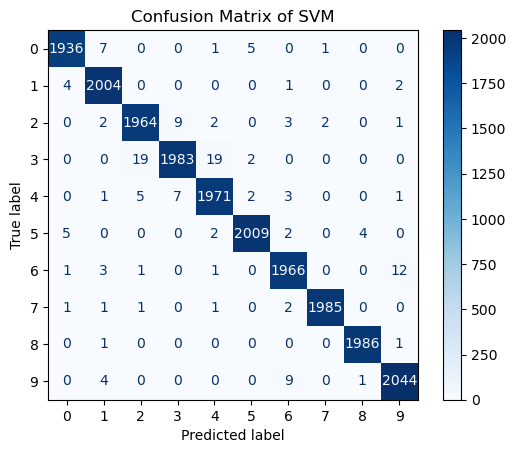

In [350]:
disp = ConfusionMatrixDisplay.from_estimator(supp, x_test,  y_test, display_labels=range(10),cmap=plt.cm.Blues,
                                      normalize= None)
disp.ax_.set_title('Confusion Matrix of SVM')
plt.savefig(f'SVM.tiff',dpi=300)

## GRID SEARCH

In [229]:
param_grid = {'C': [0.5,1, 1.5, 2, 2.5, 3, 3.5, 4,5]}
grid = GridSearchCV(supp, param_grid, cv=7, scoring='accuracy')

In [230]:
start_time = time.time()

grid.fit(x_train,y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 798.7244982719421 seconds


In [231]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 3.5}
0.9916667010219545


In [233]:
results = grid.cv_results_
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print(f"{mean_score:.10f} for {params}")

0.9897667032 for {'C': 1}
0.9906000121 for {'C': 1.5}
0.9908666921 for {'C': 2}
0.9913333744 for {'C': 2.5}
0.9915666921 for {'C': 3}
0.9916667010 for {'C': 3.5}
0.9916667010 for {'C': 4}


# 4- Constructing the classfier (Object oriented approach)

In [275]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predictions = []
        for x in X:
            distances = []
            for i in range(len(self.X_train)):
                distance = np.sqrt(np.sum(np.square(x - self.X_train[i])))
                distances.append((distance, self.y_train[i]))
            distances.sort()
            neighbors = [distances[i][1] for i in range(self.k)]
            counts = np.bincount(neighbors)
            predictions.append(np.argmax(counts))
        return predictions

In [283]:
predictor = KNN(k=5)
predictor.fit(x_train[:100],y_train[0:100])

In [284]:
y_pred = predictor.predict(x_test)

In [278]:
i = 6
print(f'prediction: {y_pred[i]}\nactual label: {y_test[i]}')

prediction: 8
actual label: 8


In [285]:
from sklearn.metrics import accuracy_score
print(f"Accuracy Score = {accuracy_score(y_test,y_pred)}")

Accuracy Score = 0.82735


In [11]:
def my_dic(dictionary,**kwargs):
    for kw in dictionary:
        print(kw,dictionary[kw])

In [12]:
my_dic(a)

ali 10
asghar 56
jack 18
zoro 19
jackass 30


In [1]:
names = ['ali','asghar','jack','zoro','jackass']
ages = [10, 56, 18, 19, 30]

In [3]:
a = dict(zip(names,ages))

In [4]:
a['ali']

10